In [105]:
# importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# SVC for classification through support vector machine
from sklearn.svm import SVC

# importing train test split & GridSearchCV library
from sklearn.model_selection import train_test_split, GridSearchCV

# model evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

# standardization library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# pipelline libraray
from sklearn.pipeline import Pipeline

# figure parameters
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 200

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [106]:
df = pd.read_csv('SalaryData_Test.csv')
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [109]:
df.describe(include=object)

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
count,15060,15060,15060,15060,15060,15060,15060,15060,15060
unique,7,16,7,14,6,5,2,40,2
top,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
freq,11021,4943,6990,1992,6203,12970,10147,13788,11360


In [80]:
df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [81]:
#checking object type column for inconsistent entries
df['workclass'].unique()

array([' Private', ' Local-gov', ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [82]:
df['education'].unique()

array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' 5th-6th',
       ' Assoc-voc', ' 9th', ' Doctorate', ' 12th', ' 1st-4th',
       ' Preschool'], dtype=object)

In [83]:
df['maritalstatus'].unique()

array([' Never-married', ' Married-civ-spouse', ' Widowed', ' Separated',
       ' Divorced', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

In [84]:
df['relationship'].unique()

array([' Own-child', ' Husband', ' Not-in-family', ' Unmarried', ' Wife',
       ' Other-relative'], dtype=object)

In [85]:
df['race'].unique()

array([' Black', ' White', ' Other', ' Amer-Indian-Eskimo',
       ' Asian-Pac-Islander'], dtype=object)

In [86]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [87]:
df['native'].unique()

array([' United-States', ' Peru', ' Guatemala', ' Mexico',
       ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
       ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
       ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
       ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
       ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
       ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
       ' Hong', ' Greece', ' Trinadad&Tobago',
       ' Outlying-US(Guam-USVI-etc)', ' France'], dtype=object)

In [88]:
df['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [89]:
#Outlier Handeling

Text(0.5, 1.0, 'boxplot')

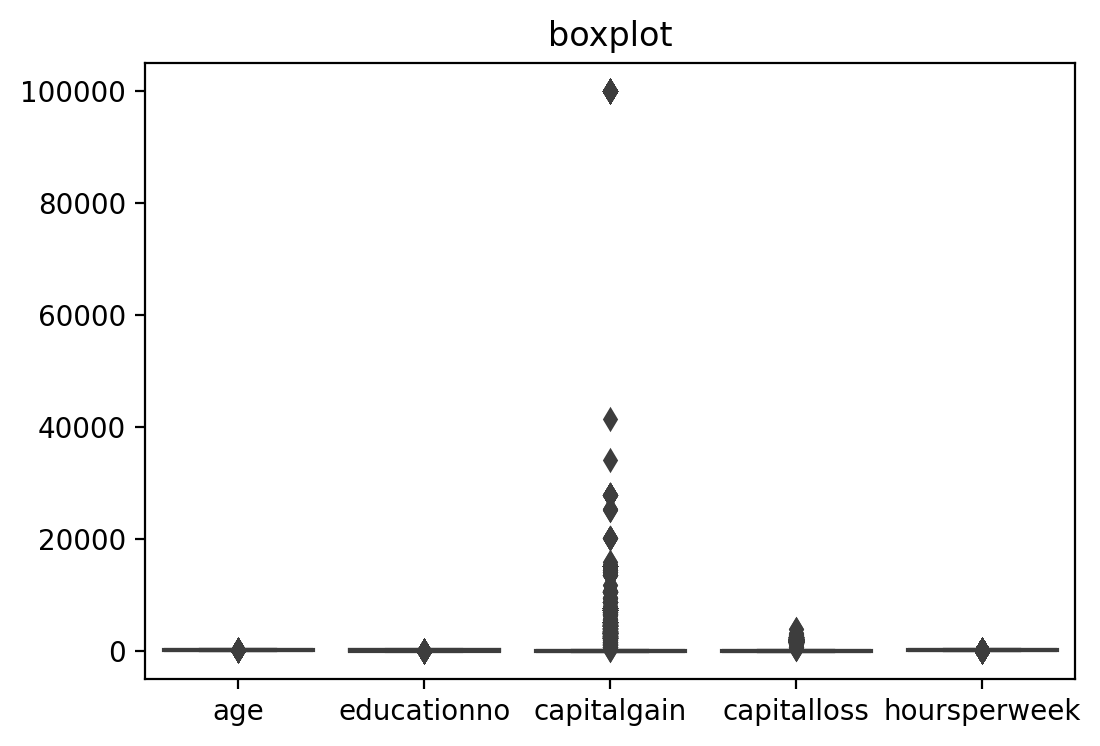

In [90]:
sns.boxplot(data = df)
plt.title('boxplot')

(0.0, 100.0)

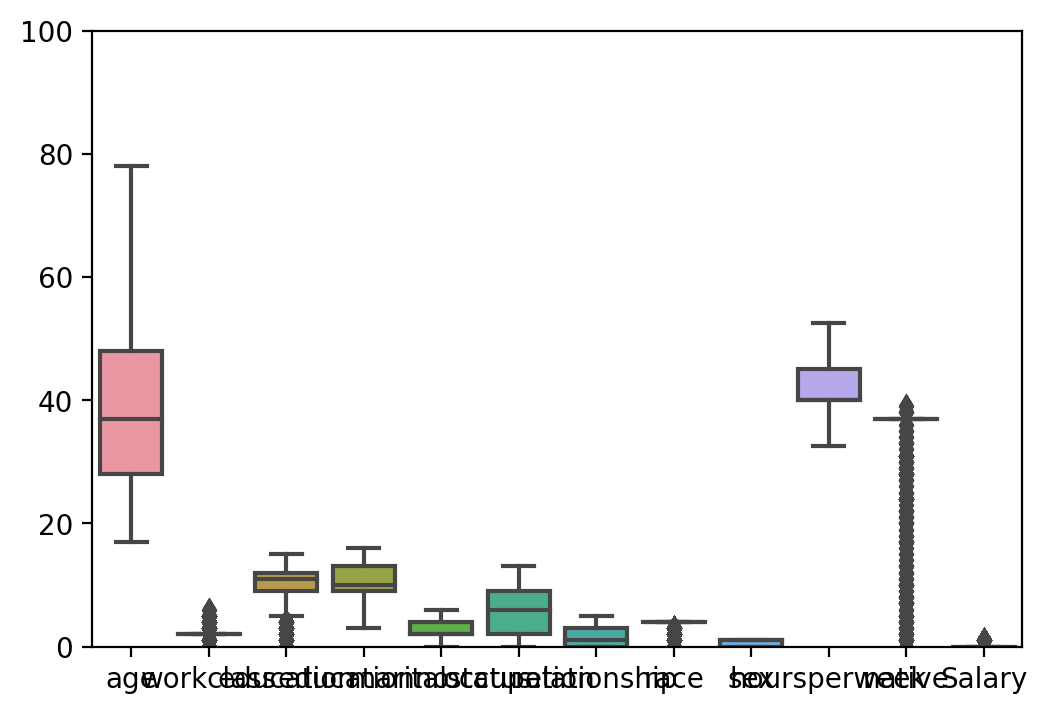

In [91]:
sns.boxplot(data = dv)
plt.ylim(0,100)

Text(0.5, 1.0, 'outlier removed ')

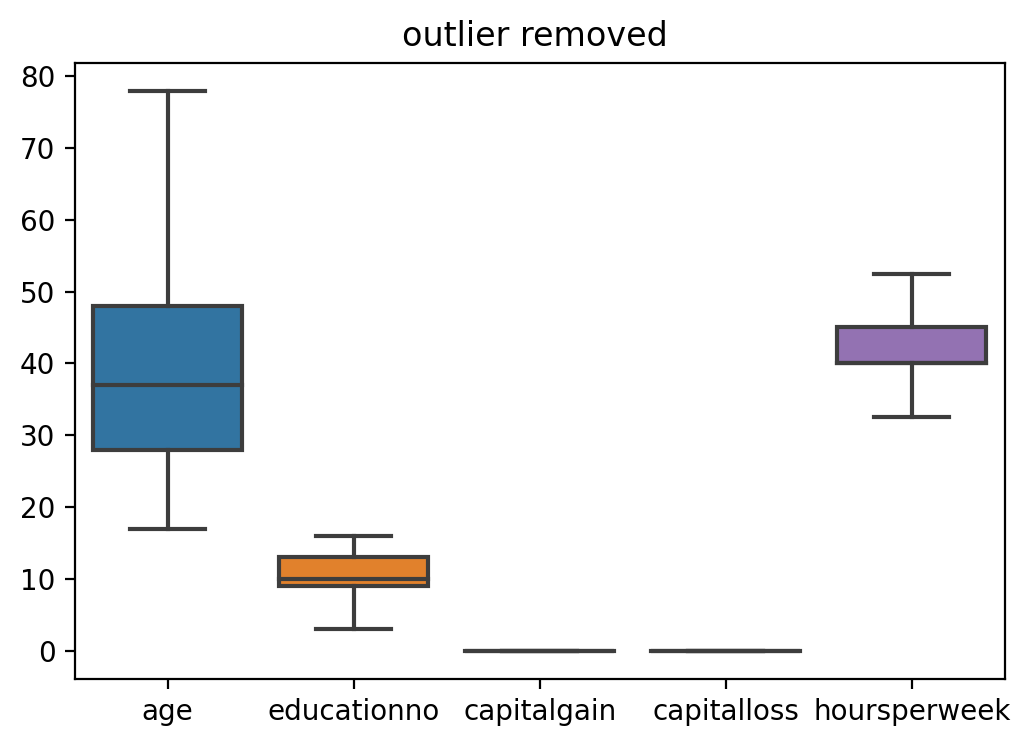

In [92]:
def outlier_remove(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    df.loc[df[col]>upper,col] = upper
    df.loc[df[col]<lower,col] = lower
outlier_remove(df = df,col = 'age')
outlier_remove(df = df,col = 'educationno')
outlier_remove(df = df,col = 'capitalgain')
outlier_remove(df = df,col = 'capitalloss')
outlier_remove(df = df,col = 'hoursperweek')

sns.boxplot(data = df)
plt.title('outlier removed ')

In [93]:
#Visualizations

In [94]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40.0,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,32.5,United-States,<=50K


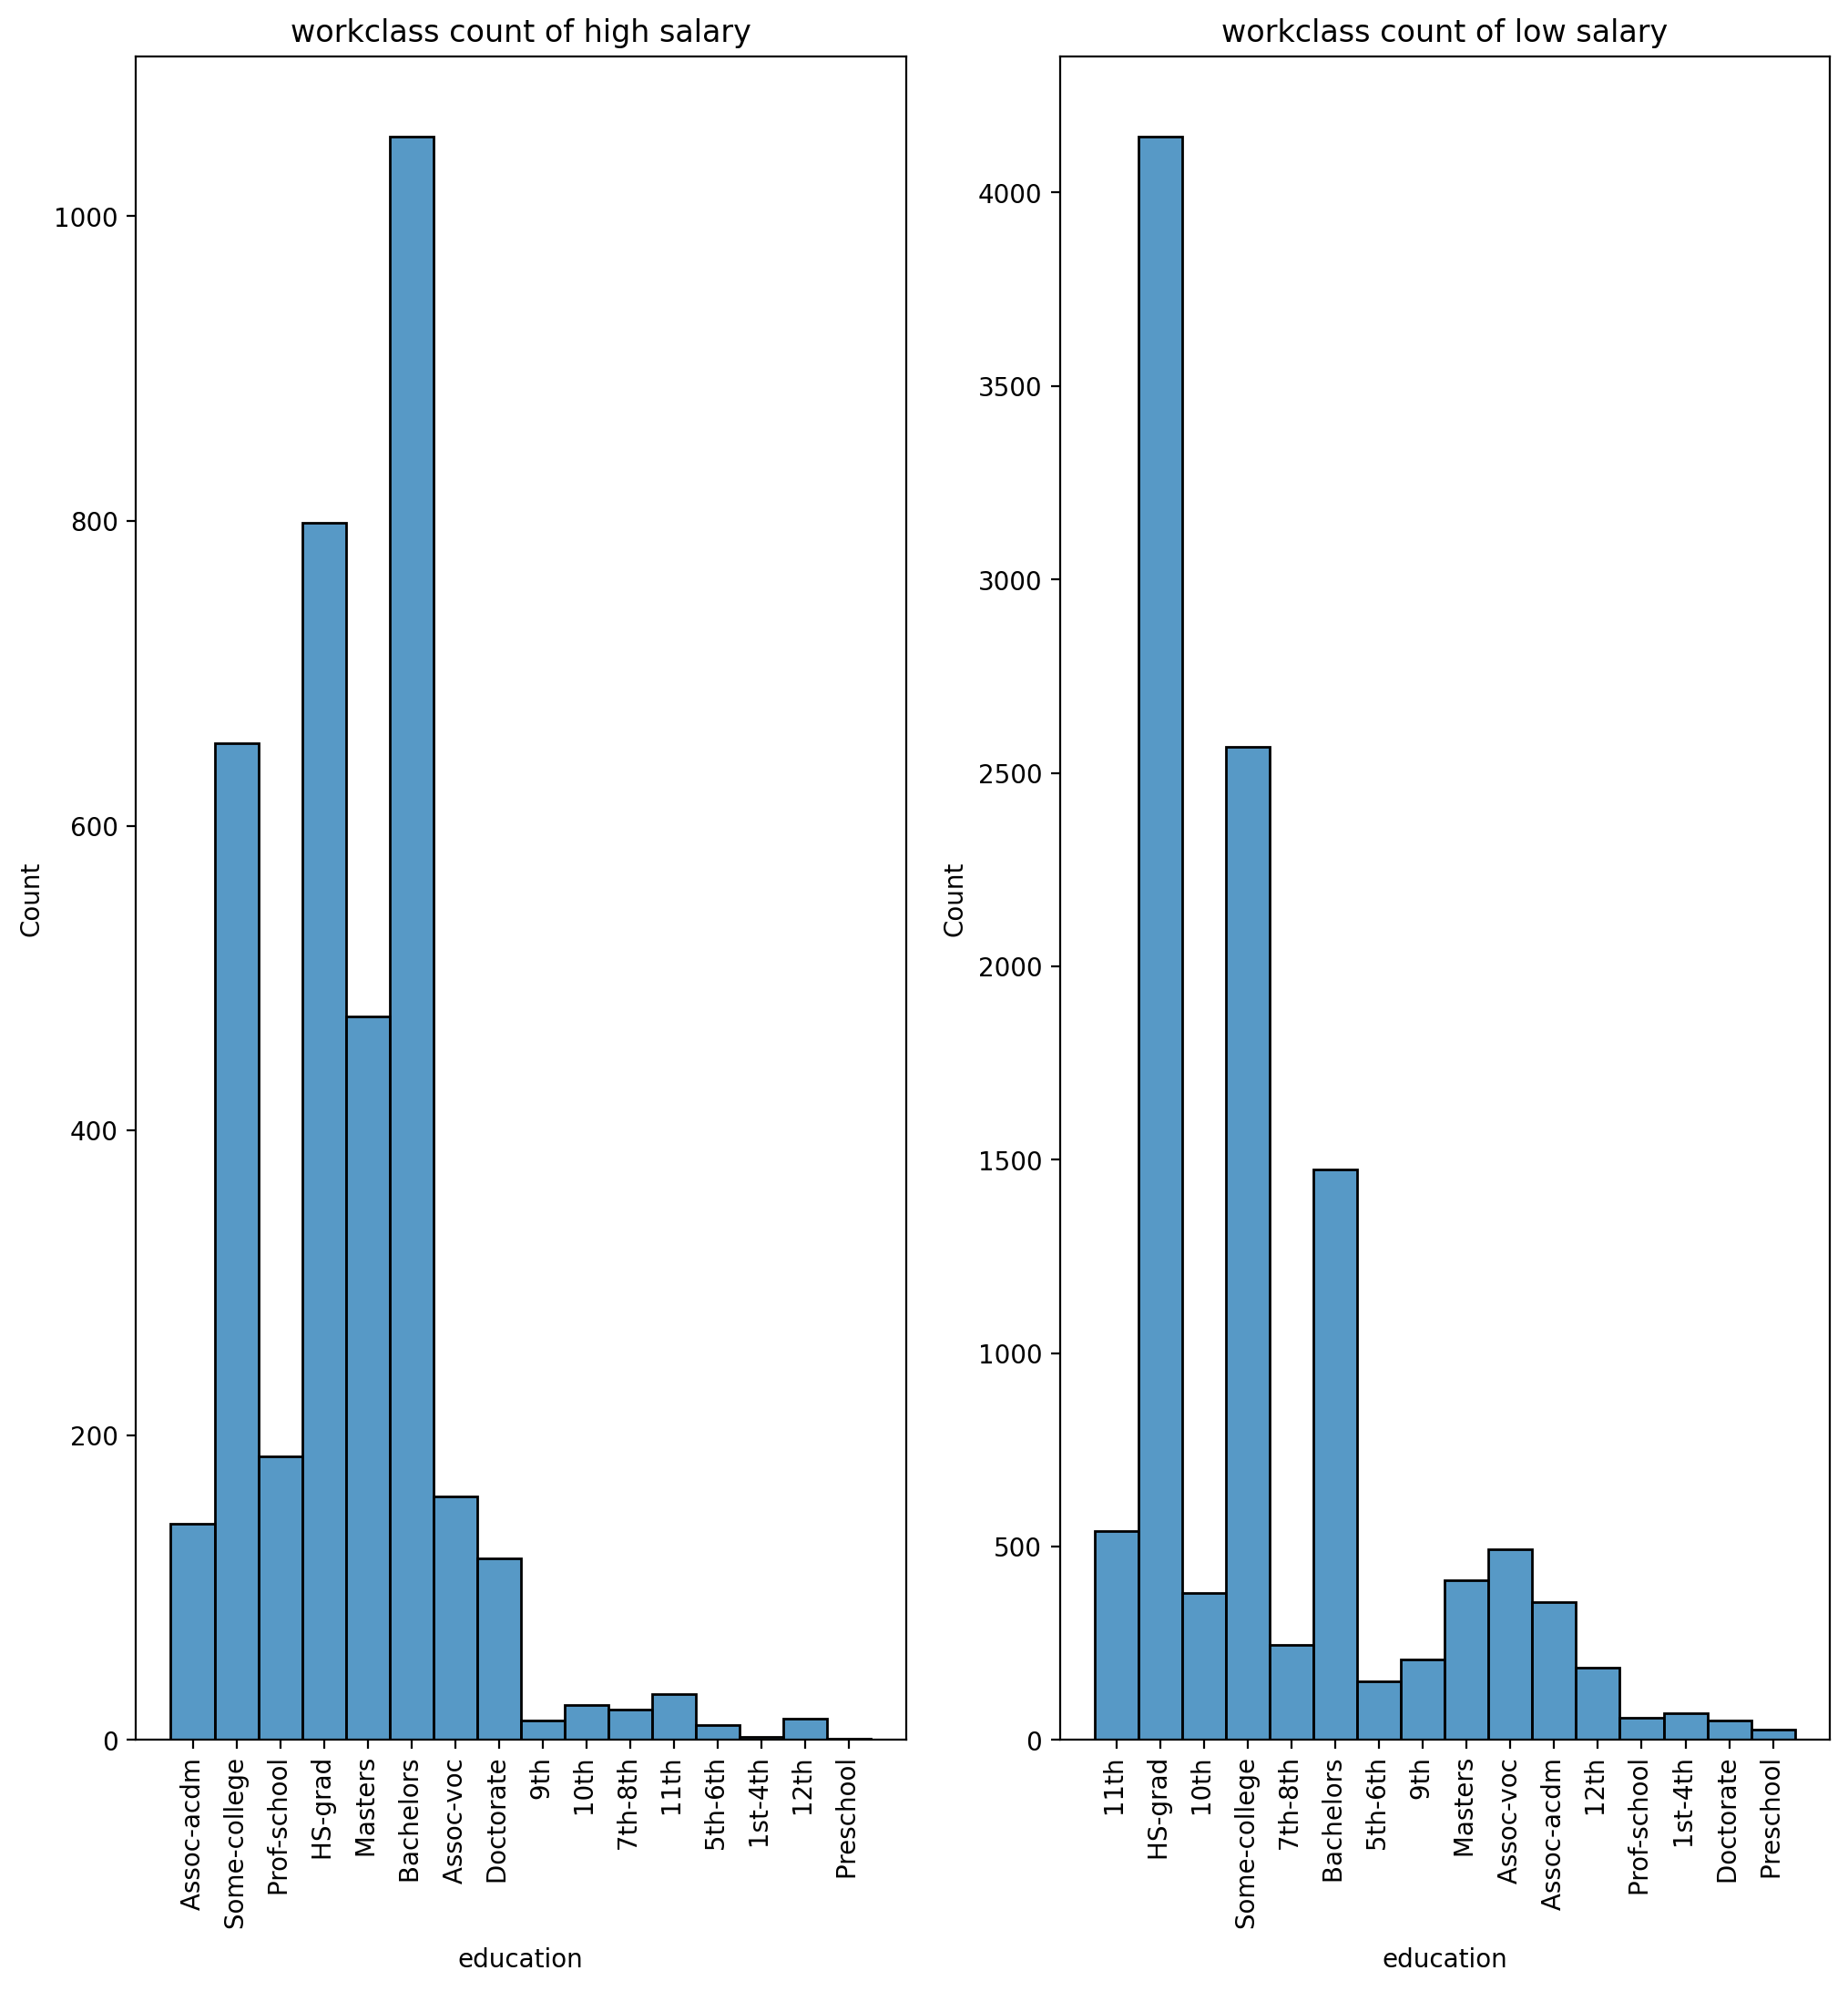

In [95]:
high_sal = df[df['Salary'] == ' >50K']
low_sal = df[df['Salary'] == ' <=50K']

plt.figure(figsize = (12,12))
plt.subplot(1,2,1)
sns.histplot(data = high_sal, x = 'education')
plt.xticks(rotation = 90)
plt.title('workclass count of high salary')

plt.subplot(1,2,2)
sns.histplot(data = low_sal, x = 'education')
plt.xticks(rotation = 90)
plt.title('workclass count of low salary')
plt.show()

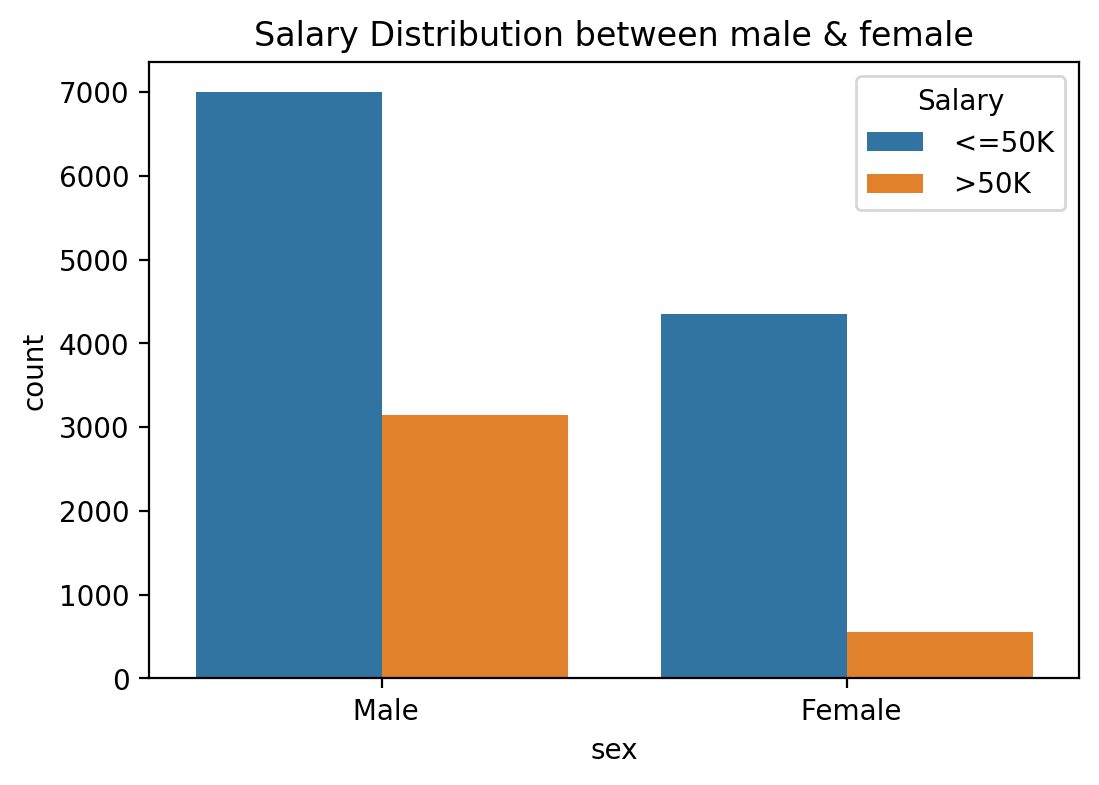

In [96]:
sns.countplot(data = df, x = 'sex', hue = 'Salary')
plt.title('Salary Distribution between male & female')
plt.show()

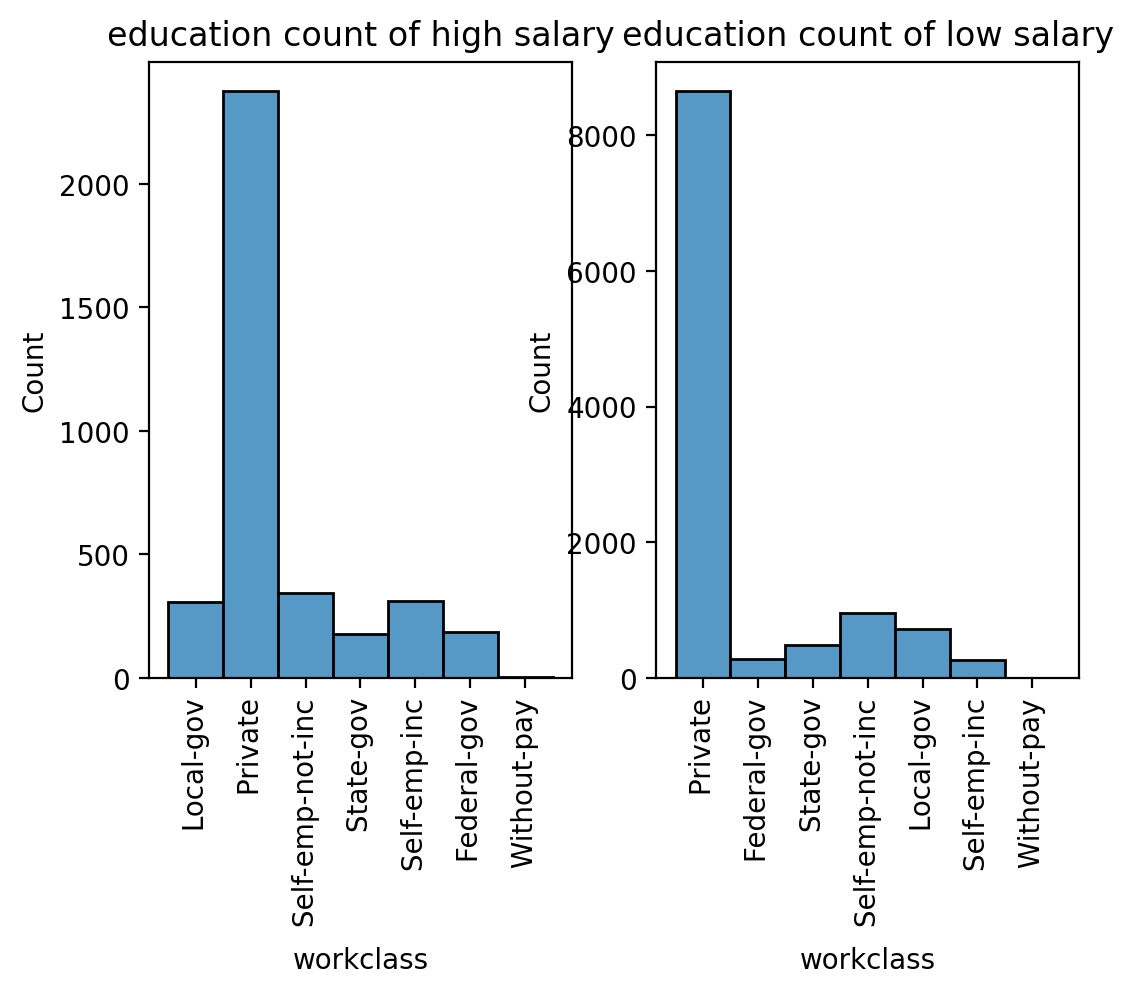

In [97]:
plt.subplot(1,2,1)
sns.histplot(data = high_sal, x = 'workclass')
plt.xticks(rotation = 90)
plt.title('education count of high salary')
plt.subplot(1,2,2)
sns.histplot(data = low_sal, x = 'workclass')
plt.xticks(rotation = 90)
plt.title('education count of low salary')
plt.show()


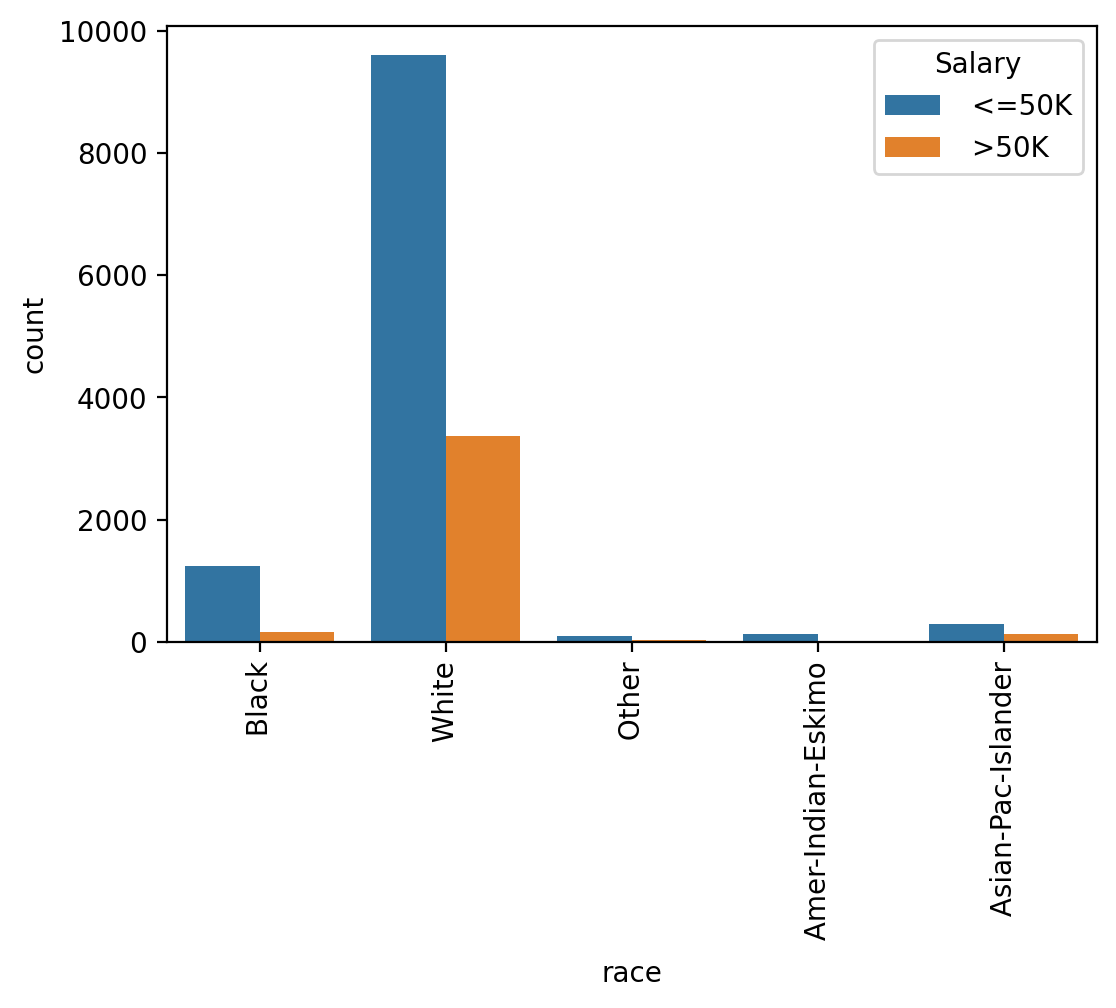

In [98]:
sns.countplot(data = df, x = 'race', hue = "Salary")
plt.xticks(rotation = 90)
plt.show()

In [99]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Category' column
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column contains categorical data
        df[col] = label_encoder.fit_transform(df[col])

df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40.0,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50.0,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40.0,37,1
3,44,2,15,10,2,6,0,2,1,0,0,40.0,37,1
4,34,2,0,6,4,7,1,4,1,0,0,32.5,37,0


In [100]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'age': [25 38 28 44 34 63 24 55 65 36 26 48 43 20 37 45 22 23 54 32 46 56 17 29
 39 52 18 21 42 33 30 47 41 19 69 50 31 59 49 58 40 27 57 61 51 73 53 78
 62 35 72 64 68 66 60 67 71 70 77 74 75 76]
Unique values in 'workclass': [2 1 4 0 5 3 6]
Unique values in 'education': [ 1 11  7 15  0 14  5  9 12  4  8  6 10  2  3 13]
Unique values in 'educationno': [ 7  9 12 10  6 15  4 13 14  3 11  5 16  8]
Unique values in 'maritalstatus': [4 2 6 5 0 3 1]
Unique values in 'occupation': [ 6  4 10  7  9  2  0  3 12 11  8 13  5  1]
Unique values in 'relationship': [3 0 1 4 5 2]
Unique values in 'race': [2 4 3 0 1]
Unique values in 'sex': [1 0]
Unique values in 'capitalgain': [0]
Unique values in 'capitalloss': [0]
Unique values in 'hoursperweek': [40.  50.  32.5 39.  48.  47.  35.  43.  52.5 38.  45.  36.  44.  41.
 33.  37.  52.  42.  46.  49.  34.  51. ]
Unique values in 'native': [37 27 12 24  5 19 10 28 35 13  7 31 38 33  3 22 17  0 29 23  8  4 34 20
  1 30  2 25 14 18 32 21  6 

<Axes: >

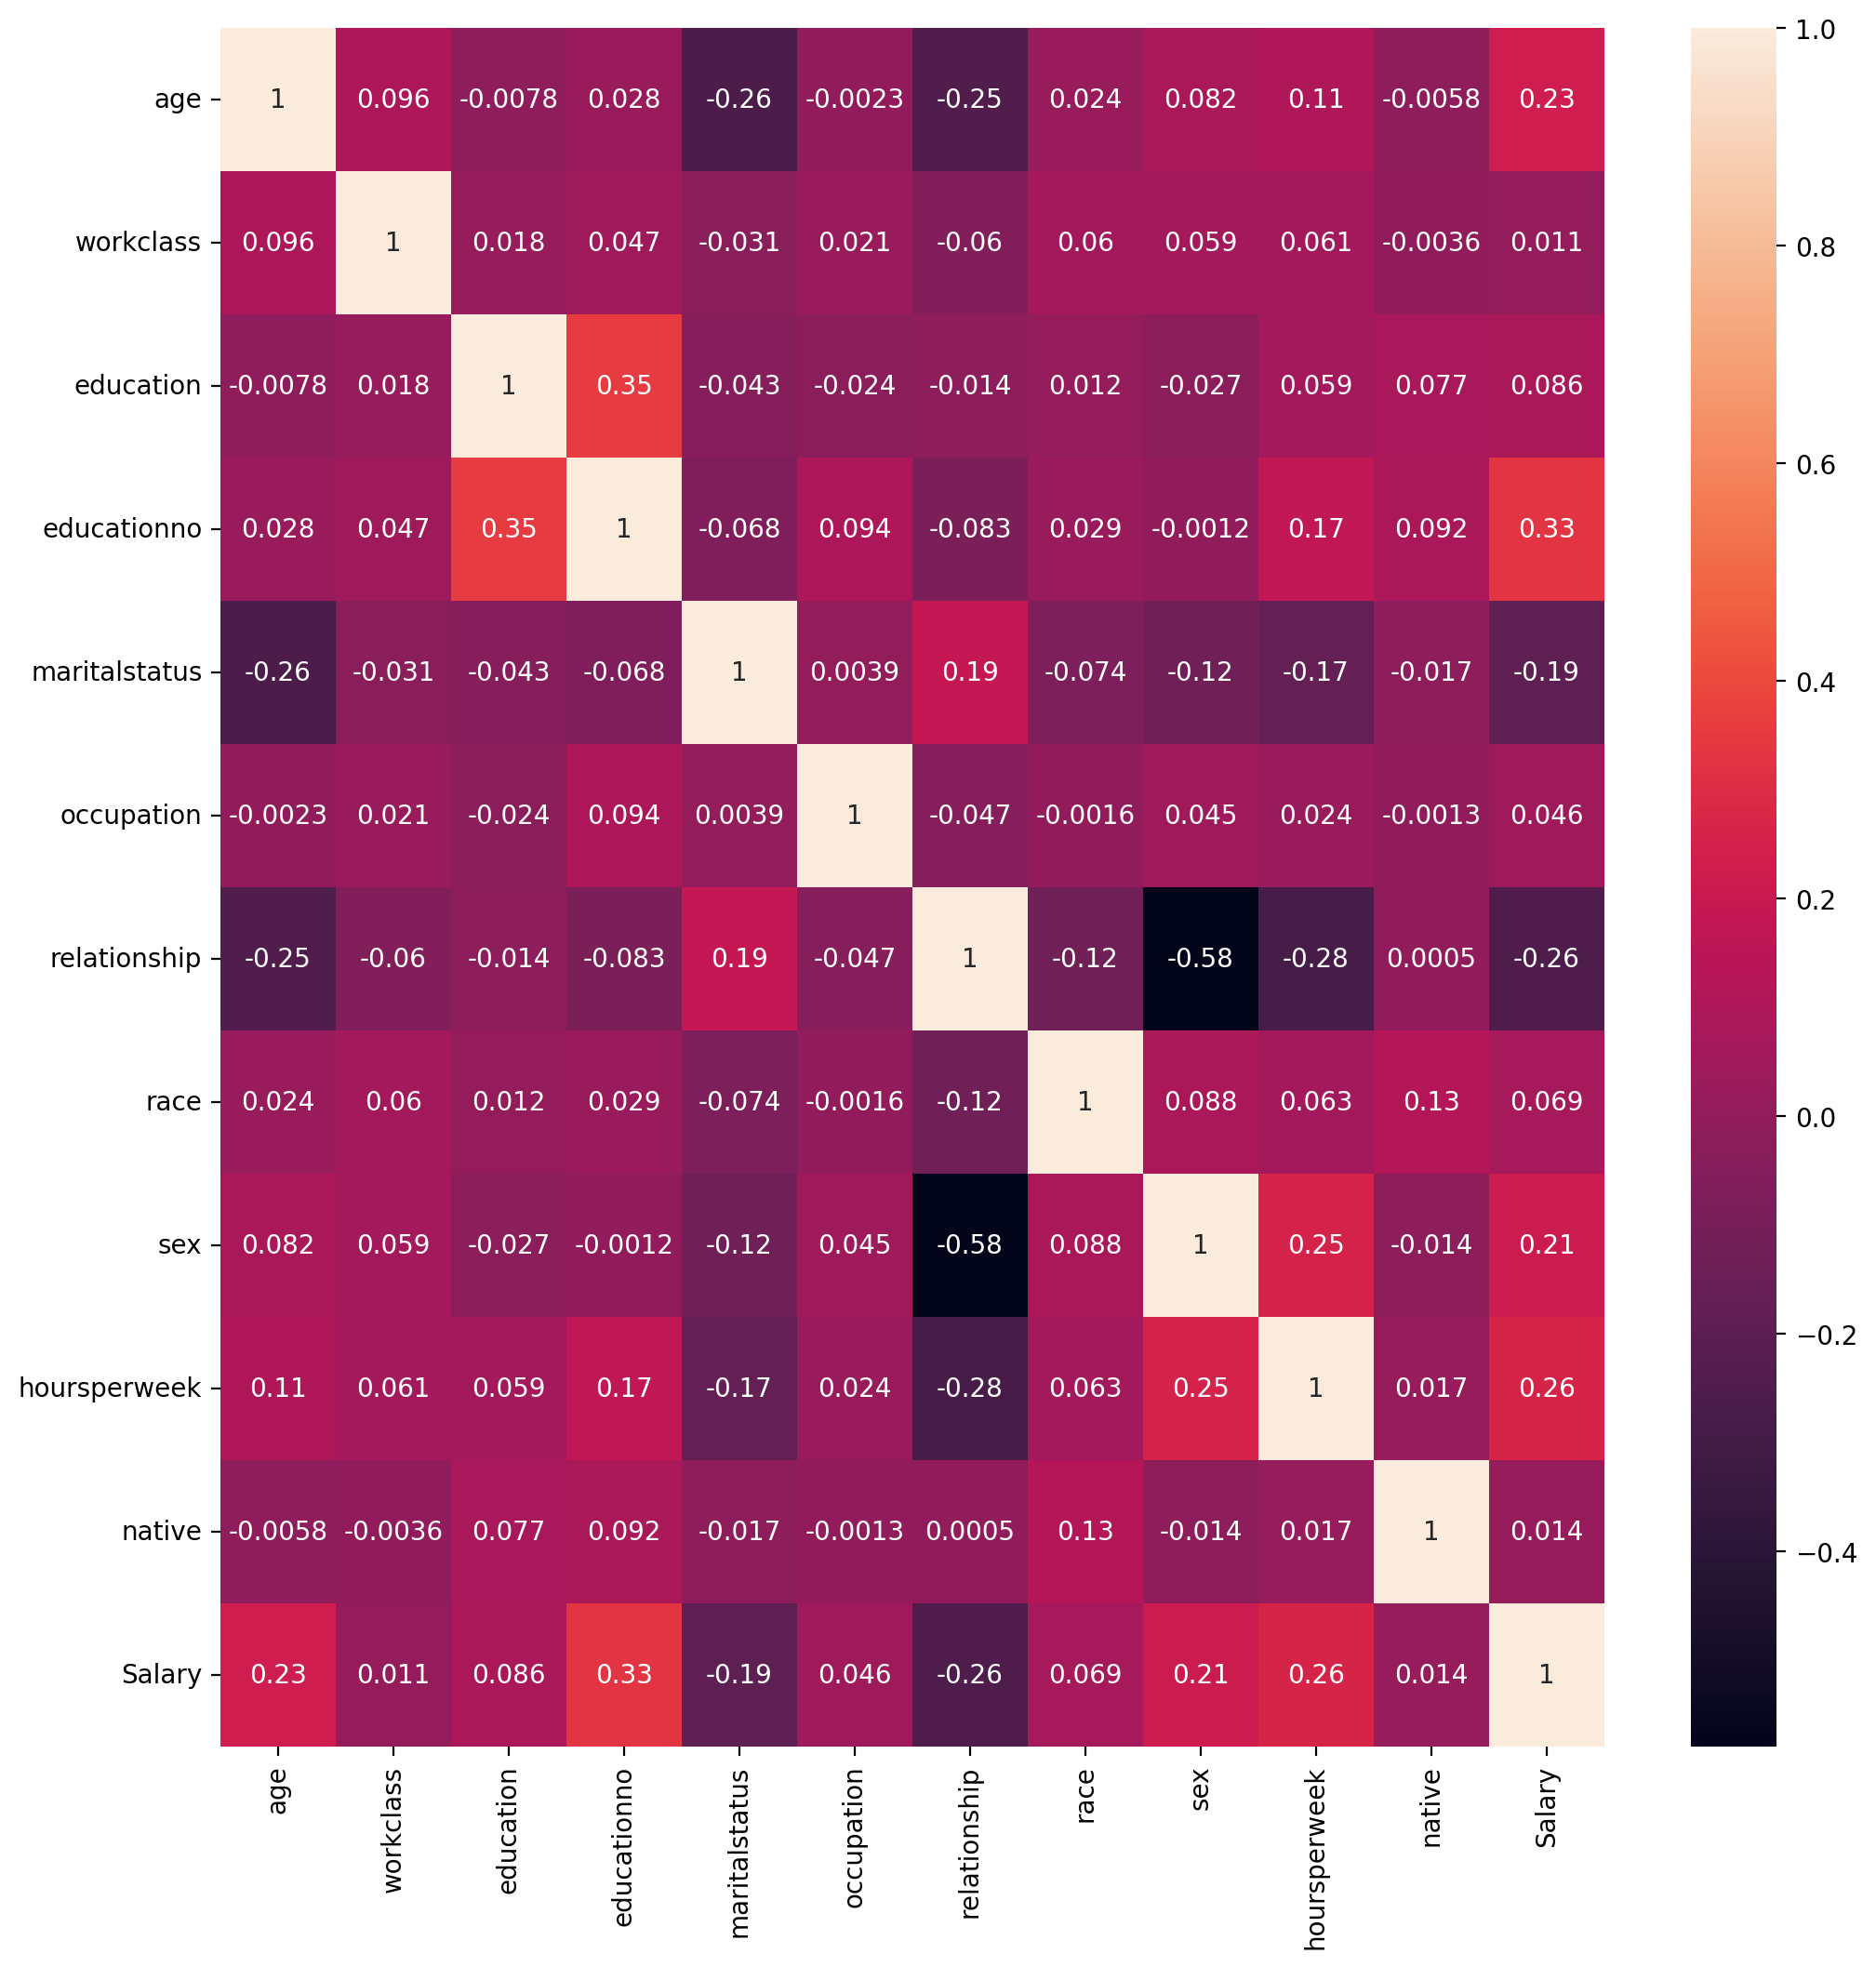

In [101]:
plt.figure(figsize = (12,12))
sns.heatmap(dv.corr(), annot=True)

In [102]:
df.drop('capitalloss', inplace=True, axis = 1)
df.drop('capitalgain', inplace=True, axis = 1)

df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,40.0,37,0
1,38,2,11,9,2,4,0,4,1,50.0,37,0
2,28,1,7,12,2,10,0,4,1,40.0,37,1
3,44,2,15,10,2,6,0,2,1,40.0,37,1
4,34,2,0,6,4,7,1,4,1,32.5,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,40.0,37,0
15056,39,2,9,13,0,9,1,4,0,36.0,37,0
15057,38,2,9,13,2,9,0,4,1,50.0,37,0
15058,44,2,9,13,0,0,3,1,1,40.0,37,0


In [110]:
preprocessed_test_df = df
preprocessed_test_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [111]:
# Store the DataFrame in the IPython database | used into another notebook
%store preprocessed_test_df 

Stored 'preprocessed_test_df' (DataFrame)
